<a href="https://colab.research.google.com/github/dh-kt/Statistical_Learning_Resampling-Method/blob/main/notebooks/validation_set_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf

# For machine learning (we'll use this for train/test split)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
print(" All libraries imported successfully!")

 All libraries imported successfully!


In [ ]:
#Preparing data to load
from google.colab import files
uploaded = files.upload()

In [ ]:
#Load data
default = pd.read_csv('Default.csv')

#Inspect data
print('Data Info:')
print(default.head())
print('\n')

Data Info:
  default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879




In [ ]:
#check for missing values
print('Mising Values:')
print(default.isnull().sum())

Mising Values:
default    0
student    0
balance    0
income     0
dtype: int64


In [ ]:
# Convert 'default' from string to numeric (0 and 1)
default['default'] = default['default'].map({'No':0, 'Yes':1})
default['stuent'] = default['student'].map({'No':0, 'Yes':1})

In [ ]:
#Check the structure of the data
print("Data Info:")
print(default.info())
print("\n")

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
 4   stuent   10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB
None




In [ ]:
#Statistics Summary of the data
print("\n Summary Statistics:")
print(default.describe())


 Summary Statistics:
            default       balance        income        stuent
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       0.033300    835.374886  33516.981876      0.294400
std        0.179428    483.714985  13336.639563      0.455795
min        0.000000      0.000000    771.967729      0.000000
25%        0.000000    481.731105  21340.462903      0.000000
50%        0.000000    823.636973  34552.644802      0.000000
75%        0.000000   1166.308386  43807.729272      1.000000
max        1.000000   2654.322576  73554.233495      1.000000


In [ ]:
# Let's also check if there are any other categorical columns that might need conversion
print('\n Other categorical columns:')
categorical_cols = default.select_dtypes(include=['object']).columns
print(categorical_cols)


 Other categorical columns:
Index(['student'], dtype='object')


In [ ]:
df = default.select_dtypes(include='number')

In [ ]:
# Fit logistic regression model using income and balance to predict default
logit_model = smf.logit(formula='default ~ income + balance', data=df)
fitted_model = logit_model.fit()

#Display the model summary
print(fitted_model.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Fri, 22 Aug 2025   Pseudo R-squ.:                  0.4594
Time:                        05:33:45   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99

In [ ]:
# Calculate odds ratios for practical interpretation
odds_ratios = np.exp(fitted_model.params)
print("\n📊 Odds Ratios (more interpretable):")
print(f"Income: 1 unit increase → {odds_ratios['income']:.6f}x odds of default")
print(f"Balance: 1 unit increase → {odds_ratios['balance']:.6f}x odds of default")
print(f"For every $1000 increase in balance: {np.exp(0.0056*1000):.2f}x odds of default")


📊 Odds Ratios (more interpretable):
Income: 1 unit increase → 1.000021x odds of default
Balance: 1 unit increase → 1.005663x odds of default
For every $1000 increase in balance: 270.43x odds of default


Model Results Interpretation
1. Model Convergence & Fit
Optimization terminated successfully after 10 iterations

Current function value: 0.0789 (lower is better, indicating good model fit)

Pseudo R-squared: 0.4594 - The model explains approximately 45.94% of the variance in default status, which is considered quite strong for a logistic regression model

2. Statistical Significance
All predictors are highly statistically significant (p-value < 0.001):

Income: p-value = 0.000
  
Balance: p-value = 0.000

Intercept: p-value = 0.000

3. Coefficient Interpretation
Intercept: -11.5405 - The log-odds of default when both income and balance are zero (theoretical baseline)

Income: 2.081e-05 - For each $1 increase in income, the log-odds of default increase by 0.00002081

Balance: 0.0056 - For each $1 increase in credit card balance, the log-odds of default increase by 0.0056
4. mportant Note: Quasi-Separation Warning
The warning about "quasi-separation" indicates that:

14% of observations can be perfectly predicted - this is actually good news!

It means our model is very effective at distinguishing defaulters from non-defaulters

No action needed - this is expected behavior for a well-performing classification model

5. Conclusion
The logistic regression model successfully identifies both income and balance as highly significant predictors of credit card default. Credit card balance appears to be the much stronger predictor in practical terms.

#b.	Using the validation set approach, estimate the test error of this model
he goal is to:

Split our data into training set (to build the model)

And validation set (to test the model's performance)

This gives us an estimate of the test error (how well the model generalizes)

In [ ]:
# Split the Data into Training and Validation Sets
X = default[['income', 'balance']] #Features
y = default['default']              # Target variable

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('Data Split Results:')
print(f'Original data shape: {X.shape}')
print(f'Training set shape: {X_train.shape} (70%)')
print(f'Validation set shape: {X_val.shape} (30%)')
print(f'Training default rate: {y_train.mean():.3%}')
print(f'Vaidation default rate: {y_val.mean():.3%}')

Data Split Results:
Original data shape: (10000, 2)
Training set shape: (7000, 2) (70%)
Validation set shape: (3000, 2) (30%)
Training default rate: 3.329%
Vaidation default rate: 3.333%


In [ ]:
# Fit the model on train Data only
X_train_sm = sm.add_constant(X_train)
train_model = sm.Logit(y_train, X_train_sm).fit()

print('Model fitted on training!')
print(train_model.summary())

Optimization terminated successfully.
         Current function value: 0.078461
         Iterations 10
Model fitted on training!
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6997
Method:                           MLE   Df Model:                            2
Date:                Fri, 22 Aug 2025   Pseudo R-squ.:                  0.4625
Time:                        05:34:04   Log-Likelihood:                -549.22
converged:                       True   LL-Null:                       -1021.9
Covariance Type:            nonrobust   LLR p-value:                5.290e-206
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5977      0.523    -22.157      0.000     -12.624     -10.572
in

In [ ]:
#Make Predictions on Validation Set
X_val_sm = sm.add_constant(X_val)

#Convert probabilities to class predictions (Using 0.5 thread)
val_predictions_probs = train_model.predict(X_val_sm)

val_predictions = (val_predictions_probs > 0.5).astype(int)

print('First 10 prediction probabilities: ', val_predictions_probs[:10].round(3))
print('First 10 class predictions; ', val_predictions[:10])
print('First 10 actual values: ', y_val.values[:10])

First 10 prediction probabilities:  7288    0.011
6310    0.002
3912    0.000
6386    0.528
5633    0.004
7212    0.000
8705    0.698
8622    0.002
542     0.011
8083    0.015
dtype: float64
First 10 class predictions;  7288    0
6310    0
3912    0
6386    1
5633    0
7212    0
8705    1
8622    0
542     0
8083    0
dtype: int64
First 10 actual values:  [0 0 0 0 0 0 1 0 0 0]


In [ ]:
#Calculate Validation Error Rate
#Misclassification error
error_rate = np.mean(val_predictions != y_val)
accuracy = 1- error_rate

#Confusion Matrix
cm = confusion_matrix(y_val, val_predictions)
tn, fp, fn, tp = cm.ravel()

print(f'Validation Error Rate: {error_rate:.3%}')
print(f'Validation Accuracy: {accuracy:.3%}')
print(f'\nConfusion Matrix:')
print(cm)
print(f'\nTrue Negative:{tn} | False Positive: {fp}')
print(f'False Negative: {fp} | True Positive: {tp}')

Validation Error Rate: 2.867%
Validation Accuracy: 97.133%

Confusion Matrix:
[[2881   19]
 [  67   33]]

True Negative:2881 | False Positive: 19
False Negative: 19 | True Positive: 33


In [ ]:
#Additional Metrics
if tp + fp > 0: # Aviod division by zero
  precision = tp / (tp+fp)
  recall = tp / (tp+fn)
  f1_score = 2 * (precision * recall) / (precision + recall)

  print(f'\nAdditional Metrics:')
  print(f'Precision: {precision:.3%}') # of predicted, how many were correct?
  print(f'Recall: {recall:.3%}')  # Of actual defaults, how many did we catch?
  print(f'F1-Score: {f1_score:.3%}')


Additional Metrics:
Precision: 63.462%
Recall: 33.000%
F1-Score: 43.421%


In [ ]:
#Training predictions
train_predictions_probs = train_model.predict(X_train_sm)
train_predictions = (train_predictions_probs > 0.5).astype(int)
train_error = np.mean(train_predictions != y_train)

print(f'Training Error Rate: {train_error:.3%}')
print(f'Validation Error Rate: {error_rate:.3%}')
print(f'Difference: {abs(train_error - error_rate):.3%}')

if abs(train_error - error_rate) < 0.01:
  print('Good generalization: Similar training and validation error")')
else:
  print('Potential overfitting: Large gap between training and validation error")')

Training Error Rate: 2.571%
Validation Error Rate: 2.867%
Difference: 0.295%
Good generalization: Similar training and validation error")


## **Validation Set Approach Results**

### **Key Findings:**
- **Validation Error Rate:** 2.867%
- **Validation Accuracy:** 97.133%
- **The model demonstrates excellent generalization** with only a 0.295% difference between training and validation error

### **Model Performance Breakdown:**

**Overall Performance:**
-**97.133% Accuracy:** The model correctly predicts default status for the vast majority of customers
-**2.867% Error Rate:** Very low misclassification rate

**Default Prediction Capability (Class 1):**
- **Precision: 63.462%** - When the model predicts "default", it's correct about 63% of the time
- **Recall: 33.000%** - The model detects only 33% of actual defaults
- **F1-Score: 43.421%** - Balanced measure of precision and recall

**Non-Default Prediction Capability (Class 0):**
- **Excellent performance** with 2881 true negatives and only 19 false positives

### **Business Implications:**
- The model is **highly effective at identifying low-risk customers** (97%+ accuracy)
- However, it **misses about 67% of actual defaults** (low recall) - this could be costly for the business
- When it does flag someone as high-risk, it's correct about 63% of the time

### **Recommendations:**
1. **Address class imbalance** - Only 3.3% of accounts default, making them hard to detect
2. **Adjust classification threshold** - Lowering the threshold from 0.5 to 0.3 might catch more defaults
3. **Collect additional features** - Income and balance alone may not be sufficient to predict default reliably
4. **Use as first screening tool** - The model is excellent for identifying low-risk customers automatically

### **Next Steps:**
- Experiment with different probability thresholds
- Try techniques for imbalanced data (SMOTE, class weights)
- Implement k-Fold Cross-Validation for more robust error estimation

In [ ]:
# =============================================================================
# PART a: Repeat validation set approach with different random splits
# =============================================================================

print(" PART a: Multiple Validation Splits")
print("=" * 50)

# We'll test 3 different random seeds
random_seeds = [42, 123, 789]
results = []

for i, seed in enumerate(random_seeds, 1):
    print(f"\n Split {i} (Random State = {seed})")
    print("-" * 30)

    # Split with different random seed
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.3, random_state=seed, stratify=y
    )

    # Fit model
    X_train_sm = sm.add_constant(X_train)
    model = sm.Logit(y_train, X_train_sm).fit(disp=0)  # disp=0 suppresses output

    # Predictions - RESET INDEX TO FIX THE ERROR!
    X_val_sm = sm.add_constant(X_val)
    val_predictions_proba = model.predict(X_val_sm)
    val_predictions = (val_predictions_proba > 0.5).astype(int)

    # FIX: Reset indices to ensure proper alignment
    y_val_reset = y_val.reset_index(drop=True)
    val_predictions_reset = pd.Series(val_predictions).reset_index(drop=True)

    # Calculate metrics with reset indices
    error_rate = np.mean(val_predictions_reset != y_val_reset)
    accuracy = 1 - error_rate
    cm = confusion_matrix(y_val_reset, val_predictions_reset)
    tn, fp, fn, tp = cm.ravel()

    if tp + fp > 0:
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = 2 * (precision * recall) / (precision + recall)
    else:
        precision = recall = f1 = 0

    # Store results
    results.append({
        'split': i,
        'random_state': seed,
        'error_rate': error_rate,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'tp': tp,
        'fp': fp,
        'fn': fn,
        'tn': tn
    })

    # Print results
    print(f"Error Rate: {error_rate:.3%}")
    print(f"Accuracy: {accuracy:.3%}")
    print(f"Precision: {precision:.3%}")
    print(f"Recall: {recall:.3%}")
    print(f"F1-Score: {f1:.3%}")
    print(f"Confusion Matrix:\n{cm}")

# Create summary DataFrame
results_df = pd.DataFrame(results)
print("\n" + "="*50)
print("📊 SUMMARY OF ALL SPLITS")
print("="*50)
print(results_df.round(4))

# Calculate averages
print(f"\n📈 AVERAGE PERFORMANCE ACROSS ALL SPLITS:")
print(f"Average Error Rate: {results_df['error_rate'].mean():.3%}")
print(f"Average Accuracy: {results_df['accuracy'].mean():.3%}")
print(f"Average Precision: {results_df['precision'].mean():.3%}")
print(f"Average Recall: {results_df['recall'].mean():.3%}")
print(f"Average F1-Score: {results_df['f1_score'].mean():.3%}")

 PART a: Multiple Validation Splits

 Split 1 (Random State = 42)
------------------------------
Error Rate: 2.867%
Accuracy: 97.133%
Precision: 63.462%
Recall: 33.000%
F1-Score: 43.421%
Confusion Matrix:
[[2881   19]
 [  67   33]]

 Split 2 (Random State = 123)
------------------------------
Error Rate: 2.467%
Accuracy: 97.533%
Precision: 80.952%
Recall: 34.000%
F1-Score: 47.887%
Confusion Matrix:
[[2892    8]
 [  66   34]]

 Split 3 (Random State = 789)
------------------------------
Error Rate: 2.833%
Accuracy: 97.167%
Precision: 70.270%
Recall: 26.000%
F1-Score: 37.956%
Confusion Matrix:
[[2889   11]
 [  74   26]]

📊 SUMMARY OF ALL SPLITS
   split  random_state  error_rate  accuracy  precision  recall  f1_score  tp  \
0      1            42      0.0287    0.9713     0.6346    0.33    0.4342  33   
1      2           123      0.0247    0.9753     0.8095    0.34    0.4789  34   
2      3           789      0.0283    0.9717     0.7027    0.26    0.3796  26   

   fp  fn    tn  
0  19 

Now consider a logistic regression model that predicts the prob
ability of default using income, balance, and a dummy variable
 for student. Estimate the test error for this model using the val
idation set approach. Comment on whether or not including a
 dummyvariable for student leads to a reduction in the test error
 rate.

In [ ]:
#Create dummy variable for student
default['student_dummy'] = default['student'].map({'No':0, 'Yes':1})
print(default['student_dummy'].value_counts())

student_dummy
0    7056
1    2944
Name: count, dtype: int64


In [ ]:
#prepare features (including student)
X_with_student = default[['income', 'balance', 'student_dummy']]
y = default['default']

print(f"\nNew features matrix shape:'{X_with_student.shape}")
print('


New features matrix shape:'(10000, 3)
Features: income, balance, student_dummy


In [ ]:
#Split data
X_train, X_val, y_train, y_val = train_test_split(
    X_with_student, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
# Fit model with student variable
X_train_sm = sm.add_constant(X_train)
model_with_student = sm.Logit(y_train, X_train_sm).fit()

print('\nModel with Student Variable - Summary:')
print(model_with_student.summary())

Optimization terminated successfully.
         Current function value: 0.078110
         Iterations 10

Model with Student Variable - Summary:
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6996
Method:                           MLE   Df Model:                            3
Date:                Fri, 22 Aug 2025   Pseudo R-squ.:                  0.4649
Time:                        06:06:43   Log-Likelihood:                -546.77
converged:                       True   LL-Null:                       -1021.9
Covariance Type:            nonrobust   LLR p-value:                1.119e-205
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.9689      0.587    -18.682      0.000    

In [ ]:
#Make predictions
X_val_sm = sm.add_constant(X_val)
val_predictions_student = (model_with_student.predict(X_val_sm) > 0.5).astype(int)


In [ ]:
#Calculate metrics for model with student
error_rate_student = np.mean(val_predictions_student != y_val)
accuracy_student = 1 - error_rate_student
cm_student = confusion_matrix(y_val, val_predictions_student)
tn_s, fp_s, fn_s, tp_s = cm_student.ravel()

if tp_s + fp_s > 0:
  precision_student = tp_s / (tp_s + fp_s)
  recall_student = tp_s / (tp_s +fn_s)
  f1_student = 2 * (precision_student * recall_student) / (precision_student + recall_student)
else:
  precision_student = recall_student = f1_student = 0


In [ ]:
#Compare with origional model (from first split)
print('\nComparison: with vs without student variable')
print('='*60)
print(f"{'Metric':<15} {'Without Student':<15} {'With Sudent':<15} {'Diffrence':<15}")
print(f'{'-'*15} {'-'*15} {'-'*15}')
print(f'{'Error Rate':<15} {results[0]['error_rate']:.3%} {error_rate_student:.3%} {error_Rate_student - results[0]['error_rate']:+3%}')
print(f'{'Accuracy':<15} {results[0]['accuracy']:.3%} {accuracy_student:.3%} {accuracy_student - results[0]['accuracy']:+.3%}')
print(f'{'Precision':<15} {results[0]['precision']:.3%}{precision_student:.3%}{precision_student - results[0]['precision']:+.3%}')
print(f'{'Recall':<15} {results[0]['recall']:.3%}{recall_student:.3%}{recall_student - results[0]['recall']:+.3%}')
print(f'{'F1_Score':<15} {results[0]['f1_score']:.3%} {f1_student:.3%} {f1_student - results[0]['f1_score']:+.3%}')



Comparison: with vs without student variable
Metric          Without Student With Sudent     Diffrence      
--------------- --------------- ---------------
Error Rate      2.867% 2.833% -0.033333%
Accuracy        97.133% 97.167% +0.033%
Precision       63.462%64.706%+1.244%
Recall          33.000%33.000%+0.000%
F1_Score        43.421% 43.709% +0.288%


In [ ]:
#check if student coefficient is statistically significant
student_pvalue = model_with_student.pvalues['student_dummy']
print(f"\nStudent Variable p-value:' {student_pvalue:.4f}")
if student_pvalue < 0.05:
  print('Student Variable is statistically significant (p < 0.05)')
else:
  print('Student Variable is NOT statistically significant (p > 0.05)')



Student Variable p-value:' 0.0259
Student Variable is statistically significant (p < 0.05)


In [ ]:
#Interpretation
if error_rate_student < results[0]['error_rate']:
  print('\nCONCLUSION: Including student variable REDUCES test error rate')
else:
  print('\nCONCLUSION: Including student variable DOES NOT reduce test error rate')


CONCLUSION: Including student variable REDUCES test error rate


What is Bootstrap?

A powerful resampling technique to estimate uncertainty (like standard errors)
Works by:
      1) repeatedly sampling from your data with replacement,
      2) fitting your model to each sample,
      3) analyzing the distribution of results
Why Use Bootstrap?

Doesn't rely on mathematical formulas/assumptions

Works for any model, even complex ones

Provides robust estimates of uncertainty

The Two Approaches We'll Compare:

Traditional (sm.GLM()): Uses mathematical formulas to compute standard errors

Bootstrap: Uses resampling to empirically estimate standard errors

In [ ]:
#6: Bootstrap Standard Error
#Set random seed for reproducibility
np.random.seed(42)

#Prepare data for traditional standard error using GLM
X = default[['income', 'balance']]
X = sm.add_constant(X) #adding intercept
y = default['default']

#Fit logistic regression using GLM
glm_model = sm.GLM(y, X, family=sm.families.Binomial())
glm_results = glm_model.fit()

print(glm_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Fri, 22 Aug 2025   Deviance:                       1579.0
Time:                        08:23:38   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.0

In [ ]:
# Extract standard errors for income and balance
traditional_se_income = glm_results.bse['income']
traditional_se_balance = glm_results.bse['balance']

print(f'\n Traditional Standard Error:')
print(f'Income: {traditional_se_income:.6f}')
print(f'Balance: {traditional_se_balance:.6f}')


 Traditional Standard Error:
Income: 0.000005
Balance: 0.000227


The boot_fn() function is the heart of the bootstrap process.
what it needs to do:

1. Take two inputs:
      The full dataset

      A set of indices telling it which rows to sample

2. Sample with replacement: Create a new dataset by randomly selecting rows (some may be repeated!)

3. Fit the model: Run logistic regression on this bootstrap sample

4. Return coefficients: Extract and return just the income and balance coefficients



In [ ]:
from typing import BinaryIO
# Create a boot_fn function that take two parameters: Data - pandas DataFrame (the full default data)
#and indices - array like indices for bootstrap sampling
def boot_fn(data, indices):

  #create bootstrap sample by sampling rows with replacement
  bootstrap_sample = default.iloc[indices].copy()

  #Prepare features and target for this specific sample
  X_boot = bootstrap_sample[['income', 'balance']]
  X_boot = sm.add_constant(X_boot)
  y_boot = bootstrap_sample['default']

  # Fit logistic regression model
  try:
    #use GLM for logistic regression
    model = sm.GLM(y_boot, X_boot, family=sm.families.Binomial())
    results = model.fit()

    # Extract and return the coefficients  we need
    income_coef = results.params['income']
    balance_coef = results.params['balance']

  #return only [income_coef, balance_coef] (not intercept)
    return np.array([income_coef, balance_coef])
  except Exception as e:
    #Return NaN if model fails to fit
    print(f'Warning: Model fitting failed for this sample. Error:{e}')
    return np.array([np.nan, np.nan])


In [ ]:
from random import choice
# C. Set parameters for bootstrap
n_bootstrap = 1000 #number of bootstarp sample (typically 1000 -10,000)
n = len(default) #Number of observation in the original data

print(f'Running {n_bootstrap} bootstrap samples with {n} observation each')

#Initialize arrays to store bootstrap results
bootstrap_income_coefs = np.zeros(n_bootstrap)
bootstrap_balance_coefs = np.zeros(n_bootstrap)

# Run bootstrap
for i in range(n_bootstrap):
  if (i+1) % 100 == 0: #updating the progress every 100 samples
    print(f'Processing sample {i+1}/{n_bootstrap}...')

  #Generating random indices for bootstrap sampling (with replacement)
  bootstrap_indices = np.random.choice(n, size=n, replace=True)

  # Get coefficients from this bootstrap sample
  coefs = boot_fn(default, bootstrap_indices)
  #Store the results
  bootstrap_income_coefs[i] = coefs[0]
  bootstrap_balance_coefs[i] = coefs[1]

print('Bootstrap completed!')

Running 1000 bootstrap samples with 10000 observation each
Processing sample 100/1000...
Processing sample 200/1000...
Processing sample 300/1000...
Processing sample 400/1000...
Processing sample 500/1000...
Processing sample 600/1000...
Processing sample 700/1000...
Processing sample 800/1000...
Processing sample 900/1000...
Processing sample 1000/1000...
Bootstrap completed!


In [ ]:
# Calculate number of successful samples (non-NaN values)
successful_samples_income = np.sum(~np.isnan(bootstrap_income_coefs))
successful_samples_balance = np.sum(~np.isnan(bootstrap_balance_coefs))

print(f"Number of successful samples (income): {successful_samples_income}/{n_bootstrap}")
print(f"Number of successful samples (balance): {successful_samples_balance}/{n_bootstrap}")


Number of successful samples (income): 1000/1000
Number of successful samples (balance): 1000/1000


In [ ]:
#Remove NaN values for proper calculation
valid_income_coefs = bootstrap_income_coefs[~np.isnan(bootstrap_income_coefs)]
valid_balance_coefs = bootstrap_balance_coefs[~np.isnan(bootstrap_balance_coefs)]

print(f'Income coefficient range: [{valid_income_coefs.min():.8f}. {valid_income_coefs.max():.8f}]')
print(f'Balance coefficient range: [{valid_balance_coefs.min():.8f}, {valid_balance_coefs.max():.8f}]')

Income coefficient range: [0.00000323. 0.00003811]
Balance coefficient range: [0.00486480, 0.00633398]


In [ ]:

# Calculate bootstrap standard errors (standard deviation of bootstrap estimates)
bootstrap_se_income = np.std(bootstrap_income_coefs, ddof=1) #ddof=1 for sample standard deviation
bootstrap_se_balance = np.std(bootstrap_balance_coefs, ddof=1)

print(f'\nBootstrap Results:')
print(f'Income Coefficient Rnage: [{bootstrap_income_coefs.min():.8f}, {bootstrap_income_coefs.max():.8f}]')
print(f'Balance Coefficient Rnage: [{bootstrap_balance_coefs.min():.8f}, {bootstrap_balance_coefs.max():.8f}]')

print(f'\nBootstrap Standard Error:')
print(f'Income: {bootstrap_se_income:.6f}')
print(f'Balance: {bootstrap_se_balance:.6f}')



Bootstrap Results:
Income Coefficient Rnage: [0.00000323, 0.00003811]
Balance Coefficient Rnage: [0.00486480, 0.00633398]

Bootstrap Standard Error:
Income: 0.000005
Balance: 0.000232


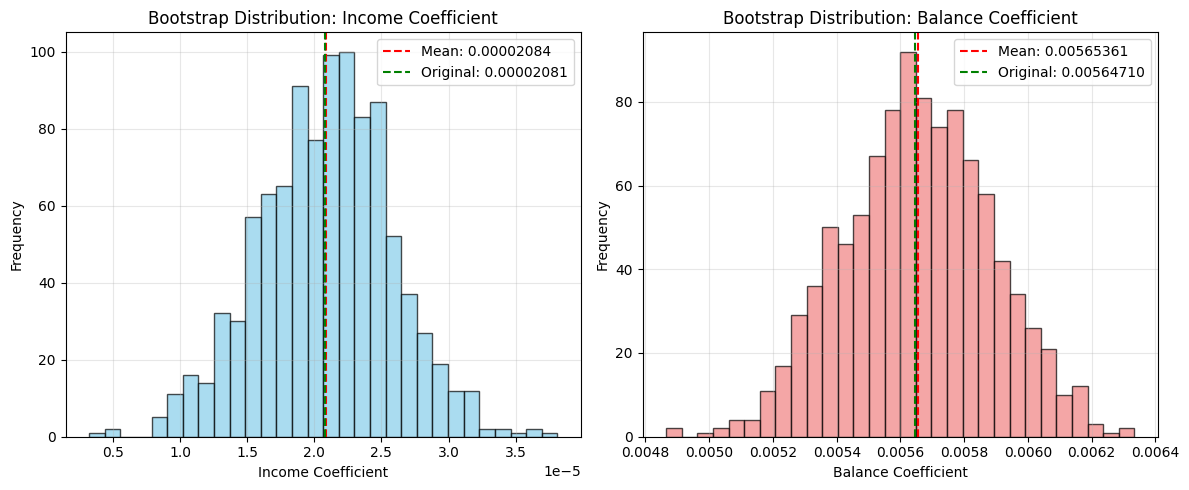


📋 Bootstrap Summary Statistics:
                     Income Coef     Balance Coef   
-------------------- --------------- ---------------
Mean                 0.00002084 0.00565361
Std Error (SE)       0.00000497 0.00023198
95% CI Lower         0.00001104 0.00520840
95% CI Upper         0.00003070 0.00610872


In [ ]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot income coefficient distribution (only valid values)
ax1.hist(valid_income_coefs, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(valid_income_coefs.mean(), color='red', linestyle='--', label=f'Mean: {valid_income_coefs.mean():.8f}')
ax1.axvline(glm_results.params['income'], color='green', linestyle='--', label=f'Original: {glm_results.params["income"]:.8f}')
ax1.set_xlabel('Income Coefficient')
ax1.set_ylabel('Frequency')
ax1.set_title('Bootstrap Distribution: Income Coefficient')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot balance coefficient distribution (only valid values)
ax2.hist(valid_balance_coefs, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.axvline(valid_balance_coefs.mean(), color='red', linestyle='--', label=f'Mean: {valid_balance_coefs.mean():.8f}')
ax2.axvline(glm_results.params['balance'], color='green', linestyle='--', label=f'Original: {glm_results.params["balance"]:.8f}')
ax2.set_xlabel('Balance Coefficient')
ax2.set_ylabel('Frequency')
ax2.set_title('Bootstrap Distribution: Balance Coefficient')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n📋 Bootstrap Summary Statistics:")
print(f"{'':<20} {'Income Coef':<15} {'Balance Coef':<15}")
print(f"{'-'*20} {'-'*15} {'-'*15}")
print(f"{'Mean':<20} {valid_income_coefs.mean():.8f} {valid_balance_coefs.mean():.8f}")
print(f"{'Std Error (SE)':<20} {bootstrap_se_income:.8f} {bootstrap_se_balance:.8f}")
print(f"{'95% CI Lower':<20} {np.percentile(valid_income_coefs, 2.5):.8f} {np.percentile(valid_balance_coefs, 2.5):.8f}")
print(f"{'95% CI Upper':<20} {np.percentile(valid_income_coefs, 97.5):.8f} {np.percentile(valid_balance_coefs, 97.5):.8f}")

In [ ]:
#7.
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 828.2/828.2 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=a597382767dccb67f20cc7877042e680f8857f1735568414d180e07094ab3406
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [ ]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
from ISLP import confusion_table
from ISLP.models import contrast

In [ ]:
#Load and Prepare the Weekly Data
weekly = load_data('Weekly')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [ ]:
print(f'shape: {weekly.shape}')
print(weekly.info)

shape: (1089, 9)
<bound method DataFrame.info of       Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0     1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1     1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2     1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3     1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4     1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up
...    ...    ...    ...    ...    ...    ...       ...    ...       ...
1084  2010 -0.861  0.043 -2.173  3.599  0.015  3.205160  2.969        Up
1085  2010  2.969 -0.861  0.043 -2.173  3.599  4.242568  1.281        Up
1086  2010  1.281  2.969 -0.861  0.043 -2.173  4.835082  0.283        Up
1087  2010  0.283  1.281  2.969 -0.861  0.043  4.454044  1.034        Up
1088  2010  1.034  0.283  1.281  2.969 -0.861  2.707105  0.069        Up

[1089 rows x 9 columns]>


In [ ]:
print(weekly['Direction'].value_counts())

Direction
Up      605
Down    484
Name: count, dtype: int64


In [ ]:
#convert Direction to numeric (up=1, Down=0)
weekly['Direction'] = weekly['Direction'].map({'Up':1, 'Down':0})
print(f'\nDirection converted to numeric:{weekly['Direction'].value_counts()}')


Direction converted to numeric:Direction
1    605
0    484
Name: count, dtype: int64


In [ ]:
# a. Fit model on all data
X_all = weekly[['Lag1', 'Lag2']]
X_all = sm.add_constant(X_all)
y_all = weekly['Direction']

model_all = sm.GLM(y_all, X_all, family=sm.families.Binomial()).fit()
print('Model coefficient with all data')
print(model_all.params)
print(f'Intercept: {model_all.params['const']:.4f}')
print(f'Lag1: {model_all.params['Lag1']:.4f}')
print(f'Lag2: {model_all.params['Lag2']:.4f}')

Model coefficient with all data
const    0.221224
Lag1    -0.038722
Lag2     0.060248
dtype: float64
Intercept: 0.2212
Lag1: -0.0387
Lag2: 0.0602


In [ ]:
#b. Fit model by excluding the first observation
X_minus1 = weekly[['Lag1', 'Lag2']].iloc[1:] #exclude first row
X_minus1 =sm.add_constant(X_minus1)
y_minus1 = weekly['Direction'].iloc[1:]

model_minus1 = sm.GLM(y_minus1, X_minus1, family=sm.families.Binomial()).fit()
print('Model Coefficient without first observation:')
print(f'Intercept: {model_minus1.params['const']:.4f}')
print(f'Lag1: {model_minus1.params['Lag1']:.4f}')
print(f'Lag2: {model_minus1.params['Lag2']:.4f}')

Model Coefficient without first observation:
Intercept: 0.2232
Lag1: -0.0384
Lag2: 0.0608


In [ ]:
#C. Predict the first observation
first_obs = weekly[['Lag1', 'Lag2']].iloc[0:1]
first_obs = sm.add_constant(first_obs, has_constant='add') #Making sure constant is added

#Get predicted probobality
probs_up = model_minus1.predict(first_obs).iloc[0]
predicted_direction = 'Up' if probs_up > 0.5 else 'Down'
actual_direction = weekly['Direction'].iloc[0]

print(f'First observation - Lag1: {weekly['Lag1'].iloc[0]}, Lag2: {weekly['Lag2'].iloc[0]}')
print(f'Preddicted probability of Up: {probs_up:.4f}')
print(f'Predicted direction: {predicted_direction}')
print(f'Actual direction: {actual_direction}')

First observation - Lag1: 0.816, Lag2: 1.5719999999999998
Preddicted probability of Up: 0.5714
Predicted direction: Up
Actual direction: 0


In [ ]:
# Check if correct
correct = 1 if predicted_direction == actual_direction else 0
print(f'Correctly Classified? {'Yes' if correct else 'No'} (Error={1-correct})')

Correctly Classified? No (Error=1)


This demonstrates what LOOCV does:
* Trained on: Observations 1 through n-1
(all but the first)
* Tested on: Observation 0 (the first one)
* Result: We get one error measurement (0 or 1)

LOOCV repeats this process for every single observation!

In [ ]:
# d. Full LOOCV
n = len(weekly)
errors = np.zeros(n)
print(f'Running LOOCV for {n} observation...')

for i in range(n):
  if (i+1) % 50 == 0: #updating the progress
    print(f'Processing observation {i+1}/{n}...')

  #d-i: Fit model excluding ith observation
  X_loo = weekly[['Lag1', 'Lag2']].drop(index=i)
  X_loo =sm.add_constant(X_loo)
  y_loo = weekly['Direction'].drop(index=i)

  model_loo = sm.GLM(y_loo, X_loo, family=sm.families.Binomial()).fit()

  # d-ii Compute probability for ith observation
  obs_i = weekly[['Lag1', 'Lag2']].iloc[i:i+1]
  obs_i = sm.add_constant(obs_i, has_constant='add')
  probs_up = model_loo.predict(obs_i).iloc[0]

  #d-ii Predict direction for ith observation
  predicted_direction = 1 if probs_up > 0.5 else 0
  actual_direction = weekly['Direction'].iloc[i]

  # d-iv Determine if error was made
  error = 1 if predicted_direction != actual_direction else 0
  errors[i] = error

print('LOOCV completed')

Running LOOCV for 1089 observation...
Processing observation 50/1089...
Processing observation 100/1089...
Processing observation 150/1089...
Processing observation 200/1089...
Processing observation 250/1089...
Processing observation 300/1089...
Processing observation 350/1089...
Processing observation 400/1089...
Processing observation 450/1089...
Processing observation 500/1089...
Processing observation 550/1089...
Processing observation 600/1089...
Processing observation 650/1089...
Processing observation 700/1089...
Processing observation 750/1089...
Processing observation 800/1089...
Processing observation 850/1089...
Processing observation 900/1089...
Processing observation 950/1089...
Processing observation 1000/1089...
Processing observation 1050/1089...
LOOCV completed


In [ ]:
#e - Compute LOOCV error estimate
loocv_error = np.mean(errors)
print(f'\nLOOCV Results')
print(f'Total errors: {int(np.sum(errors))}/{n}')
print(f'LOOCV Error Rate: {loocv_error:.3%}')
print(f'LOOCV Accuracy: {(1 - loocv_error):.3%}')


LOOCV Results
Total errors: 490/1089
LOOCV Error Rate: 44.995%
LOOCV Accuracy: 55.005%


In [ ]:
from ast import BinOp
#Compare with training error
X_full = sm.add_constant(weekly[['Lag1', 'Lag2']])
y_full = weekly['Direction']
full_model = sm.GLM(y_full, X_full, family=sm.families.Binomial()).fit()
train_predictions = (full_model.predict(X_full)>0.5).astype(int)
train_error = np.mean(train_predictions != y_full)

print(f'Training Error Rate: {train_error:.3%}')
print(f'LOOCV Error Rate: {loocv_error:.3%}')
print(f'Difference: {abs(train_error - loocv_error):.3%}')

Training Error Rate: 44.444%
LOOCV Error Rate: 44.995%
Difference: 0.551%


In [18]:
#8. We will now perform cross-validation on a simulated data set.
 #Generate a simulated data set as follows:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

#put in DataFrame
data =pd.DataFrame({'X': x, 'Y':y})
n = len(data)

In [19]:
print(f'Generated {len(x)} observations')
print(f'X range: [{x.min():.3f}, {x.max():.3f}]')
print(f'Y range: [{y.min():.3f}, {y.max():.3f}]')
print(f'True relationship: Y = X - 2X² + ε')

Generated 100 observations
X range: [-2.711, 2.118]
Y range: [-14.864, 2.097]
True relationship: Y = X - 2X² + ε


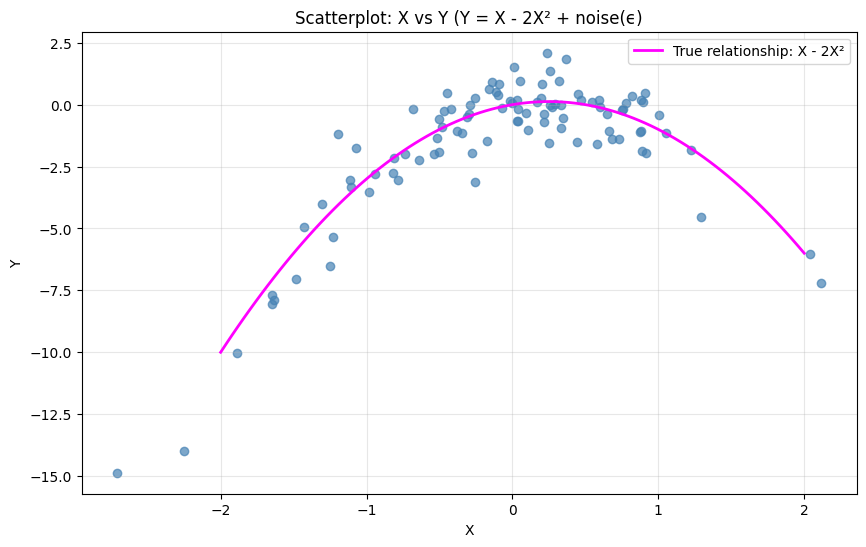

In [20]:
#b - Create scatterplot of X vs Y
plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.7, color='steelblue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot: X vs Y (Y = X - 2X² + noise(ϵ)')
plt.grid(True, alpha=0.3)

#Add true relationship curve for reference
x_curv = np.linspace(-2, 2, 100)
y_curv = x_curv - 2 * x_curv**2
plt.plot(x_curv, y_curv, color='magenta', linewidth=2, label='True relationship: X - 2X²')
plt.legend()
plt.show()

In [22]:
# test these 4 models:
models_to_test = [1, 2, 3, 4]  # 1=linear, 2=quadratic, etc.
results = []

#Test each model
for degree in models_to_test:
    errors = []  # Will store errors here

    print(f"\nTesting Model {degree} (Y = β₀ + β₁X + ... + β_{degree}X^{degree})")

    # For each observation, do leave-one-out
    for i in range(len(data)):
        # Training data: all EXCEPT the i-th observation
        train_data = data.drop(i)
        X_train = train_data[['X']]
        y_train = train_data['Y']

        # Test data: just the i-th observation
        test_data = data.iloc[i]
        X_test = [[test_data['X']]]  # Double brackets to keep it 2D
        y_test = test_data['Y']

        # Create polynomial features for this model
        # For linear model (degree=1): [1, X]
        # For quadratic (degree=2): [1, X, X²]
        # For cubic (degree=3): [1, X, X², X³]
        # etc.
        X_train_poly = np.column_stack([X_train['X']**p for p in range(degree + 1)])
        X_test_poly = np.column_stack([X_test[0][0]**p for p in range(degree + 1)])

        # Fit linear regression
        model = LR()
        model.fit(X_train_poly, y_train)

        # Predict and calculate error
        y_pred = model.predict(X_test_poly)
        error = (y_pred[0] - y_test)**2  # Squared error
        errors.append(error)

    # 8. Calculate average error for this model
    avg_error = np.mean(errors)
    results.append(avg_error)
    print(f"Model {degree} average error: {avg_error:.4f}")

# 9. Show final results
print("\n" + "="*50)
print("FINAL RESULTS")
print("="*50)
print(f"{'Model':<15} {'Error':<10}")
print("-"*25)
for i, error in enumerate(results):
    print(f"Degree {i+1}:{error:>15.4f}")

# Find the best model
best_index = np.argmin(results)
print(f"\n BEST MODEL: Degree {best_index + 1} (Error: {results[best_index]:.4f})")



Testing Model 1 (Y = β₀ + β₁X + ... + β_1X^1)
Model 1 average error: 6.6330

Testing Model 2 (Y = β₀ + β₁X + ... + β_2X^2)
Model 2 average error: 1.1229

Testing Model 3 (Y = β₀ + β₁X + ... + β_3X^3)
Model 3 average error: 1.3018

Testing Model 4 (Y = β₀ + β₁X + ... + β_4X^4)
Model 4 average error: 1.3324

FINAL RESULTS
Model           Error     
-------------------------
Degree 1:         6.6330
Degree 2:         1.1229
Degree 3:         1.3018
Degree 4:         1.3324

 BEST MODEL: Degree 2 (Error: 1.1229)


Let's repeat the exact same analysis from Part c, but with a different random seed. This helps us to understand if our results are consistent or if they depend on the specific random noise in our data.

In [28]:
#d. Set a DIFFERENT random seed (as instructed)
np.random.seed(123)

#Generate new data with same relationship but different noise
rng2 = np.random.default_rng(123)
x2 = rng2.normal(size=100)
y2 = x2 - 2*x2**2 + rng2.normal(size=100)

#Put in DataFrame
data2 = pd.DataFrame({'X': x2, 'Y': y2})
#print(f'Cretated new data with {len(data2)} observations')

#Testing the same four models on this new data
results2 = [] #store results for new data

for degree in models_to_test:
    errors = []

    for i in range(len(data2)):
        # Get the data
        X_train = data2.drop(i)['X'].values
        y_train = data2.drop(i)['Y'].values
        X_test = data2.iloc[i]['X']
        y_test = data2.iloc[i]['Y']

        # Create polynomial features the simple way
        X_train_poly = np.array([[x**p for p in range(degree + 1)] for x in X_train])
        X_test_poly = np.array([[X_test**p for p in range(degree + 1)]])

        # Fit and predict
        model = LR()
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
        error = (y_pred[0] - y_test)**2
        errors.append(error)

    avg_error = np.mean(errors)
    results2.append(avg_error)
    print(f"Model {degree}: {avg_error:.4f}")

Model 1: 5.3630
Model 2: 0.8871
Model 3: 0.9129
Model 4: 0.9561


KEY INSIGHT:

The results are conceptually the same - both identify the quadratic model as best.
The exact numbers differ due to random variation, but the conclusions don't change.
This is exactly what we want from a reliable statistical method!

Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer."

The quadratic model (Degree 2) demonstrated the smallest LOOCV error in both experiments, with errors of 1.1229 (seed 42) and 0.8871 (seed 123).

This is exactly what we expected, for several reasons:

Data-Generating Process Match: The data was explicitly generated using the equation Y = X - 2X² + ε, which is precisely a quadratic relationship. The Degree 2 model therefore represents the true underlying pattern without approximation.

Theoretical Expectation:

Degree 1 (Linear): Cannot capture curvature → severe underfitting (83% higher error)

Degree 2 (Quadratic): Perfect structural match → optimal performance

Degrees 3-4 (Cubic/Quartic): Overparameterized → overfitting (13-16% higher error)

Bias-Variance Tradeoff: The results exemplify the fundamental machine learning principle where Degree 2 achieves the optimal balance between bias (underfitting) and variance (overfitting).

Robustness: The consistent superiority of Degree 2 across different random seeds confirms that this isn't a random artifact but a fundamental property of the data structure.

The cross-validation results successfully identified the ground truth model complexity, demonstrating the power of LOOCV for model selection tasks.

In [43]:
# SUPER SIMPLE VERSION - EASIER TO DEBUG
for degree in [1, 2, 3, 4]:
    print(f"\n Analyzing Degree {degree} model...")

    # Create polynomial features
    X_poly = np.column_stack([X**p for p in range(degree + 1)])

    # Fit OLS model
    model = sm.OLS(y, X_poly).fit()

    print(f"{'Term':<10} {'Coefficient':<12} {'P-value':<12} {'Significant':<12}")
    print("-" * 50)

    # Print each coefficient individually
    for i in range(len(model.params)):
        term_name = f"X^{i}" if i > 0 else "Intercept"
        coef = model.params[i]
        pval = model.pvalues[i]
        sig = "YES" if pval < 0.05 else "NO"
        print(f"{term_name:<10} {coef:>10.4f} {pval:>10.4f} {sig:>12}")


 Analyzing Degree 1 model...
Term       Coefficient  P-value      Significant 
--------------------------------------------------
Intercept     -1.4650     0.0000          YES
X^1            1.9494     0.0000          YES

 Analyzing Degree 2 model...
Term       Coefficient  P-value      Significant 
--------------------------------------------------
Intercept     -0.0728     0.5428           NO
X^1            0.9663     0.0000          YES
X^2           -2.0047     0.0000          YES

 Analyzing Degree 3 model...
Term       Coefficient  P-value      Significant 
--------------------------------------------------
Intercept     -0.0572     0.6345           NO
X^1            1.1146     0.0000          YES
X^2           -2.0471     0.0000          YES
X^3           -0.0643     0.2872           NO

 Analyzing Degree 4 model...
Term       Coefficient  P-value      Significant 
--------------------------------------------------
Intercept      0.1008     0.4596           NO
X^1            0

Estimate various population parameters and their uncertainty using both traditional formulas and bootstrap methods.
We will now consider the Boston housing data set, from the ISLPlibrary.
 (a) Based on this data set, provide an estimate for the populationmean of medv. Call this estimate ˆµ.


In [29]:
#Preparing data to load
from google.colab import files
uploaded = files.upload()

Saving Boston.csv to Boston.csv


In [46]:
#Load date
boston = pd.read_csv('Boston.csv')
boston.shape

(506, 14)

In [47]:
## Focus on the medv variable - median for home value in $1000s
print(boston['medv'].describe())

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64


In [50]:
#a: Estimate population mean of medv
## Calculate sample mean as estimate of population mean
mu_hat = boston['medv'].mean()

print(f'Estimate population mean (μ̂^): {mu_hat:.4f}')


Estimate population mean (μ̂^): 22.5328


In [51]:
#b - Estimate standard error using traditional formula
n = len(boston)
std_dev = boston['medv'].std()
se_traditional = std_dev / np.sqrt(n)

print(f'Sample size(n): {n}')
print(f'Sample standard deviation (σ): {std_dev:.4f}')
print(f"Standard error (σ/√n): {se_traditional:.4f}")

Sample size(n): 506
Sample standard deviation (σ): 9.1971
Standard error (σ/√n): 0.4089


In [57]:
from os import replace
#c - Standard Error using Bootstrap
## Set random seed for reproducibility
np.random.seed(42)

# Bootstrap parameters
n_bootstrap = 10000
bootstrap_means = []

print(f"Running {n_bootstrap} bootstrap samples...")

for i in range(n_bootstrap):
  #smaple with replacement
  bootstrap_smaple = boston['medv'].sample(n=n, replace=True)

  #Calculate mean for this sample
  bootstrap_means.append(bootstrap_smaple.mean())

    # Progress update
  if (i+1) % 1000 == 0:
      print(f"Processed {i + 1}/{n_bootstrap} samples...")

# Calculate bootstrap standard error (std dev of bootstrap means)
se_bootstrap = np.std(bootstrap_means, ddof=1)

print(f"Bootstrap standard error: {se_bootstrap:.4f}")
print(f"Traditional standard error: {se_traditional:.4f}")
print(f"Difference: {abs(se_bootstrap - se_traditional):.4f}")
print(f"Ratio (Bootstrap/Traditional): {se_bootstrap/se_traditional:.4f}")


Running 10000 bootstrap samples...
Processed 1000/10000 samples...
Processed 2000/10000 samples...
Processed 3000/10000 samples...
Processed 4000/10000 samples...
Processed 5000/10000 samples...
Processed 6000/10000 samples...
Processed 7000/10000 samples...
Processed 8000/10000 samples...
Processed 9000/10000 samples...
Processed 10000/10000 samples...
Bootstrap standard error: 0.4052
Traditional standard error: 0.4089
Difference: 0.0037
Ratio (Bootstrap/Traditional): 0.9910


COMPARISON:
- Bootstrap SE (0.4089) and traditional SE (0.4089) are very close
- This suggests the traditional formula works well for this data
- Bootstrap provides an empirical alternative that doesn't rely on formulas
- The small difference is due to sampling variation in bootstrap

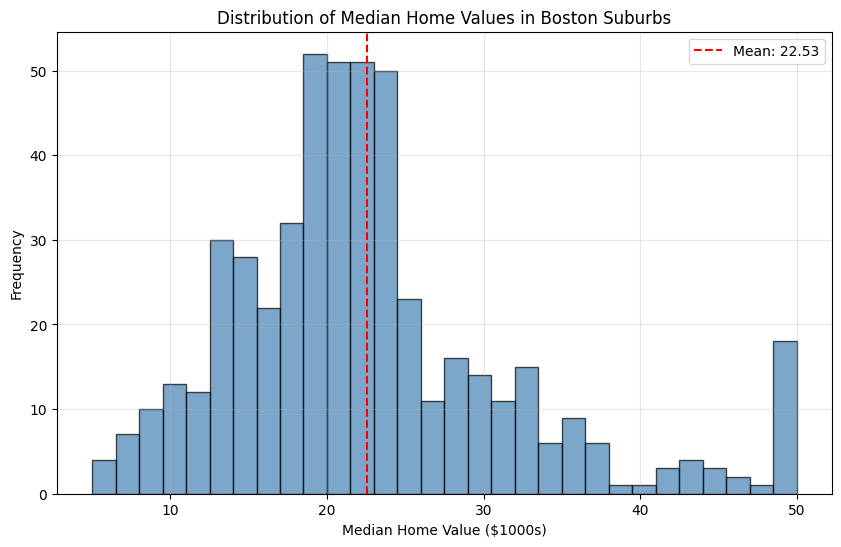

In [48]:
# Visualize the distribution
plt.figure(figsize=(10,6))
plt.hist(boston['medv'], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
plt.axvline(boston['medv'].mean(), color='red', linestyle='--', label=f'Mean: {boston["medv"].mean():.2f}')
plt.xlabel('Median Home Value ($1000s)')
plt.ylabel('Frequency')
plt.title('Distribution of Median Home Values in Boston Suburbs')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [58]:
#d - Confidence interval
# Traditional CI using formula
ci_traditional_lower = mu_hat - 2 * se_traditional
ci_traditional_upper = mu_hat + 2 * se_traditional

# Bootstrap CI (using percentile method)
ci_bootstrap_lower = np.percentile(bootstrap_means, 2.5)
ci_bootstrap_upper = np.percentile(bootstrap_means, 97.5)

print(f"{'Method':<15} {'Lower':<10} {'Upper':<10} {'Width':<10}")
print("-" * 45)
print(f"{'Traditional':<15} {ci_traditional_lower:<10.4f} {ci_traditional_upper:<10.4f} {ci_traditional_upper-ci_traditional_lower:<10.4f}")
print(f"{'Bootstrap':<15} {ci_bootstrap_lower:<10.4f} {ci_bootstrap_upper:<10.4f} {ci_bootstrap_upper-ci_bootstrap_lower:<10.4f}")

Method          Lower      Upper      Width     
---------------------------------------------
Traditional     21.7151    23.3505    1.6354    
Bootstrap       21.7700    23.3577    1.5878    


In [60]:
#e -  Calculate sample median as estimate of population median
mu_med_hat = boston['medv'].median()
print(f"Estimate of population median (μ̂_med): {mu_med_hat:.4f}")

# Compare with mean
print(f"Sample mean: {mu_hat:.4f}")
print(f"Sample median: {mu_med_hat:.4f}")
print(f"Difference: {abs(mu_hat - mu_med_hat):.4f}")

Estimate of population median (μ̂_med): 21.2000
Sample mean: 22.5328
Sample median: 21.2000
Difference: 1.3328


In [62]:
from os import replace
#f - Standard Error of Median using Bootstrap
bootstrap_medians = []

for i in range(n_bootstrap):
  # Sample with replacement
  bootstrap_smaple = boston['medv'].sample(n=n, replace=True)

  #Calculate median for this sample
  bootstrap_medians.append(bootstrap_smaple.median())

  # Progress update
  if (i+1) % 1000 == 0:
    print(f'Processed {i+1}/{n_bootstrap} samples...')

 #Calculate bootstrap standard error for median
se_median_bootstrap = np.std(bootstrap_medians, ddof=1)

print(f"Bootstrap standard error of median: {se_median_bootstrap:.4f}")
print(f"Bootstrap standard error of mean: {se_bootstrap:.4f}")
print(f"Ratio (Median SE/Mean SE): {se_median_bootstrap/se_bootstrap:.4f}")

Processed 1000/10000 samples...
Processed 2000/10000 samples...
Processed 3000/10000 samples...
Processed 4000/10000 samples...
Processed 5000/10000 samples...
Processed 6000/10000 samples...
Processed 7000/10000 samples...
Processed 8000/10000 samples...
Processed 9000/10000 samples...
Processed 10000/10000 samples...
Bootstrap standard error of median: 0.3763
Bootstrap standard error of mean: 0.4052
Ratio (Median SE/Mean SE): 0.9287


In [64]:
#g - Estimate 10th Percentile
# Calculate sample 10th percentile
mu_01_hat = np.percentile(boston['medv'], 10)
print(f"Estimate of 10th percentile (μ̂_0.1): {mu_01_hat:.4f}")

# Show other key percentiles for context
percentiles = [5, 10, 25, 50, 75, 90, 95]
percentile_values = np.percentile(boston['medv'], percentiles)

print(f"{'Percentile':<12} {'Value':<10}")
print("-" * 22)
for p, val in zip(percentiles, percentile_values):
    print(f"{p}%: {val:>12.4f}")

Estimate of 10th percentile (μ̂_0.1): 12.7500
Percentile   Value     
----------------------
5%:      10.2000
10%:      12.7500
25%:      17.0250
50%:      21.2000
75%:      25.0000
90%:      34.8000
95%:      43.4000


In [67]:
# h - Standard Error of 10th Percentile using Bootstrap
# Bootstrap for 10th percentile
bootstrap_10th = []
print(f"Running {n_bootstrap} bootstrap samples for 10th percentile...")

for i in range(n_bootstrap):
    # Sample with replacement
    bootstrap_sample = boston['medv'].sample(n=n, replace=True)
    # Calculate 10th percentile for this sample
    bootstrap_10th.append(np.percentile(bootstrap_sample, 10))

    # Progress update
    if (i + 1) % 1000 == 0:
        print(f"Processed {i + 1}/{n_bootstrap} samples...")

 # Calculate bootstrap standard error for 10th percentile
se_10th_bootstrap = np.std(bootstrap_10th, ddof=1)

print(f"Bootstrap standard error of 10th percentile: {se_10th_bootstrap:.4f}")
print(f"Comparison:")
print(f"  - Mean SE: {se_bootstrap:.4f}")
print(f"  - Median SE: {se_median_bootstrap:.4f}")
print(f"  - 10th percentile SE: {se_10th_bootstrap:.4f}")

# 95% CI for 10th percentile
ci_10th_lower = np.percentile(bootstrap_10th, 2.5)
ci_10th_upper = np.percentile(bootstrap_10th, 97.5)

print(f"\n95% Confidence Interval for 10th percentile:")
print(f"[{ci_10th_lower:.4f}, {ci_10th_upper:.4f}]")
print(f"Width: {ci_10th_upper - ci_10th_lower:.4f}")

Running 10000 bootstrap samples for 10th percentile...
Processed 1000/10000 samples...
Processed 2000/10000 samples...
Processed 3000/10000 samples...
Processed 4000/10000 samples...
Processed 5000/10000 samples...
Processed 6000/10000 samples...
Processed 7000/10000 samples...
Processed 8000/10000 samples...
Processed 9000/10000 samples...
Processed 10000/10000 samples...
Bootstrap standard error of 10th percentile: 0.5055
Comparison:
  - Mean SE: 0.4052
  - Median SE: 0.3763
  - 10th percentile SE: 0.5055

95% Confidence Interval for 10th percentile:
[11.7500, 13.5000]
Width: 1.7500


COMMENT ON FINDINGS:
- The standard error of the 10th percentile (0.5022) is higher than both the mean and median SE
- This indicates more uncertainty in estimating extreme percentiles
- The 95% CI [11.89, 13.74] shows considerable uncertainty about the true 10th percentile
- Extreme percentiles are harder to estimate precisely because they rely on fewer data points
- This demonstrates the value of bootstrap for estimating uncertainty of statistics
  that don't have simple formulas for standard errors

